In [1]:
# Data handling and processing
import pandas as pd
import numpy as np

In [2]:
# Data visualisation & images
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [3]:
# Pipeline and machine learning algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Model evaluation and fine-tuning 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')

## EDA with visuals

In [6]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [7]:
print(train.shape)

(73147, 16)


In [8]:
print(test.shape)

(31349, 15)


In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB
None


### Variable Description

|Variable	|Description|
|--|--|
 |id	| Unique ID|
 |program_id	| ID for program
 |program_type	| Type of program|
 |program_duration|	 Program duration in days|
 |test_id|	 test ID|
 |test_type|	 Type of test (offline/online)|
 |difficulty_level|	 Difficulty level of test|
 |trainee_id	| ID for trainee|
 |gender	| Gender of trainee|
 |education|	 Education Level of trainee|
 |city_tier	| Tier of city of residence for  trainee|
 |age	| Age of trainee|
 |total_programs_enrolled	| Total Programs Enrolled by trainee|
 |is_handicapped|	 Does trainee suffer from a disability?|
 |trainee_engagement_rating|	Instructer/teaching assistant provided trainee engagement rating for the course|
 |is_pass|	 0 - test failed, 1 -  test passed|

In [10]:
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [11]:
print(train.isnull().sum())

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64


In [12]:
# print(test.isnull().sum())

In [13]:
train.nunique()

id                           73147
program_id                      22
program_type                     7
program_duration                10
test_id                        188
test_type                        2
difficulty_level                 4
trainee_id                   18500
gender                           2
education                        5
city_tier                        4
age                             45
total_programs_enrolled         13
is_handicapped                   2
trainee_engagement_rating        5
is_pass                          2
dtype: int64

##### As we can see 'age' and 'trainee_engagement_rating ' contain missing values.

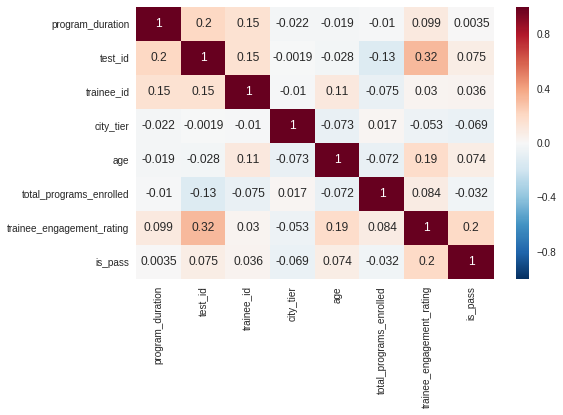

In [14]:
fig = plt.figure(figsize = (8,5))
sns.heatmap(train.corr(), annot = True)
plt.show()

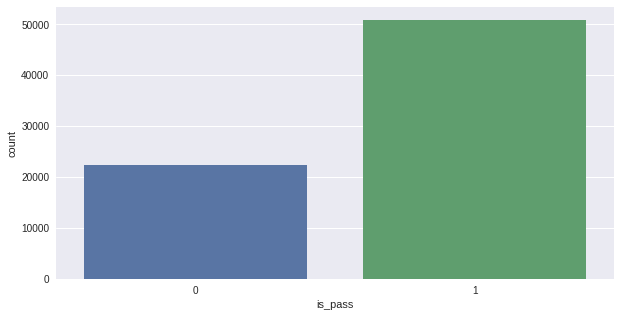

1    50867
0    22280
Name: is_pass, dtype: int64


In [15]:
# Plot graph of Survived count and provide this numerically too
fig = plt.figure(figsize = (10,5))
sns.countplot(x='is_pass', data = train)
plt.show()
print(train['is_pass'].value_counts())

In [16]:
train = train.drop(['id','test_id','program_id','trainee_id'], axis=1)

In [17]:
train.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0
1,T,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1
2,Z,120,online,easy,M,Matriculation,1,40.0,1,N,2.0,1
3,T,117,offline,easy,F,Matriculation,3,NaN,4,N,1.0,1
4,V,131,offline,intermediate,F,High School Diploma,1,42.0,2,N,4.0,1


In [18]:
# Return the counts of each unique value in the Cabin column
print(train['education'].value_counts())



High School Diploma    34371
Matriculation          26169
Bachelors              11581
No Qualification         514
Masters                  512
Name: education, dtype: int64


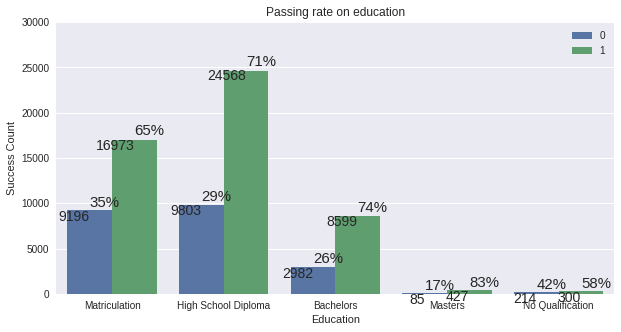

In [19]:
fig = plt.figure(figsize = (10,5))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'education', hue = 'is_pass',data = train)
ax.set_title('Passing rate on education')
ax.set_ylim(0,30000)
ax.set_xlabel('Education')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="left",va="bottom", size=15)
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
           '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

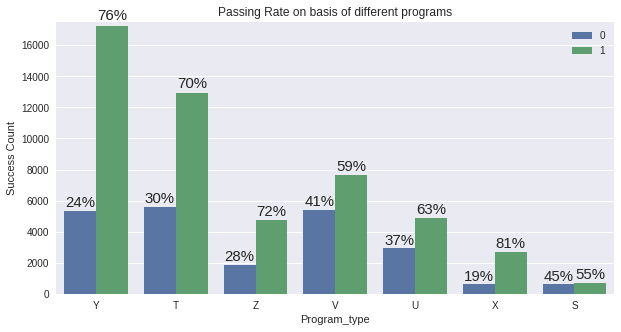

In [20]:
fig = plt.figure(figsize = (10,5))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'program_type', hue = 'is_pass',data = train)
ax.set_title('Passing Rate on basis of different programs')
ax.set_ylim(0,17500)
ax.set_xlabel('Program_type')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center",va="bottom", size=15)
#     ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
#            '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

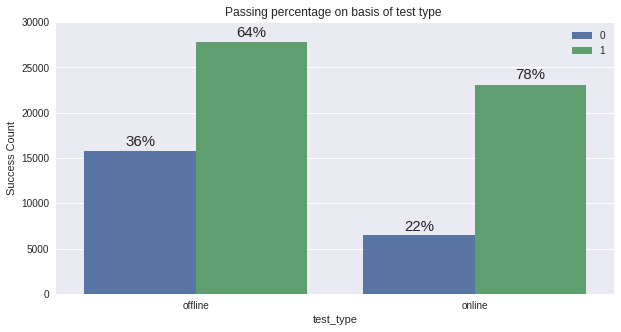

In [21]:
fig = plt.figure(figsize = (10,5))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'test_type', hue = 'is_pass',data = train)
ax.set_title('Passing percentage on basis of test type ')
ax.set_ylim(0,30000)
ax.set_xlabel('test_type')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center",va="bottom", size=15)
#     ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
#            '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

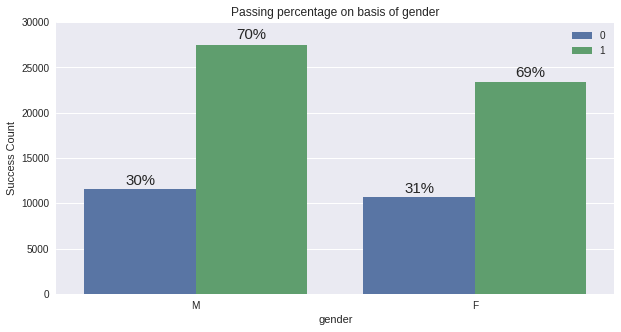

In [22]:
fig = plt.figure(figsize = (10,5))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'gender', hue = 'is_pass',data = train)
ax.set_title('Passing percentage on basis of gender')
ax.set_ylim(0,30000)
ax.set_xlabel('gender')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center",va="bottom", size=15)
#     ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
#            '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

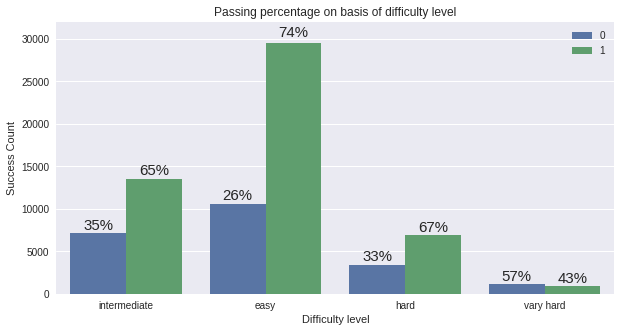

In [23]:
fig = plt.figure(figsize = (10,5))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'difficulty_level', hue = 'is_pass',data = train)
ax.set_title('Passing percentage on basis of difficulty level')
ax.set_ylim(0,32000)
ax.set_xlabel('Difficulty level')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center",va="bottom", size=15)
#     ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
#            '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

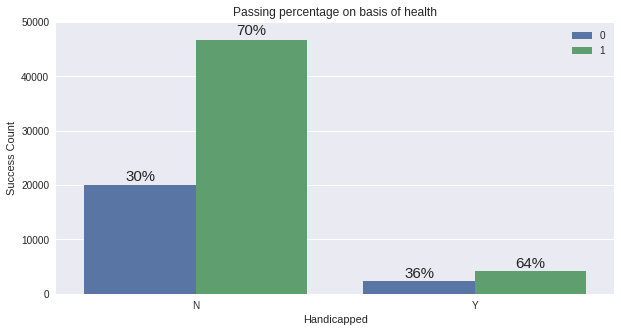

In [24]:
fig = plt.figure(figsize = (10,5))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'is_handicapped', hue = 'is_pass',data = train)
ax.set_title('Passing percentage on basis of health')
ax.set_ylim(0,50000)
ax.set_xlabel('Handicapped')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center",va="bottom", size=15)
#     ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
#            '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

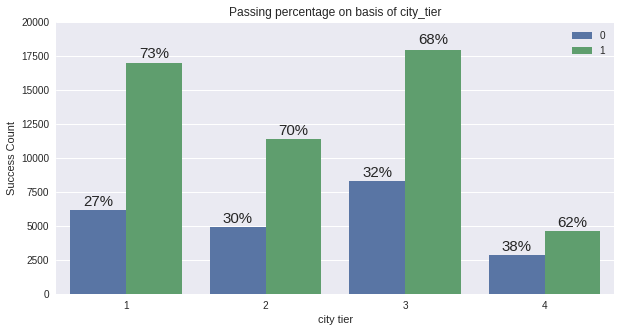

In [25]:
fig = plt.figure(figsize = (10,5))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'city_tier', hue = 'is_pass',data = train)
ax.set_title('Passing percentage on basis of city_tier')
ax.set_ylim(0,20000)
ax.set_xlabel('city tier')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center",va="bottom", size=15)
#     ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
#            '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

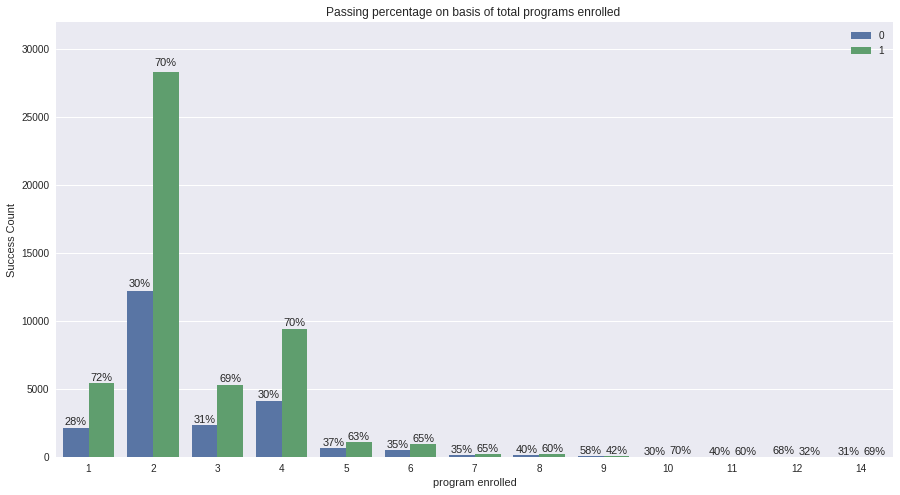

In [26]:
fig = plt.figure(figsize = (15,8))
# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'total_programs_enrolled', hue = 'is_pass',data = train)
ax.set_title('Passing percentage on basis of total programs enrolled ')
ax.set_ylim(0,32000)
ax.set_xlabel('program enrolled')
ax.set_ylabel('Success Count')
ax.legend(loc = 1)

# # Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+ p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center",va="bottom", size=11)
#     ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
#            '{:.0f}'.format(height[i]), va="top",ha="right", size=14)
plt.show()

### Label Encoding

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 12 columns):
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 6.7+ MB


In [28]:
train['gender'].unique()

array(['M', 'F'], dtype=object)

In [29]:
sex = {"M": 0, "F": 1}
data = [train, test]

for d in data:
    d['gender'] = d['gender'].map(sex)

In [30]:
train['education'].unique()

array(['Matriculation', 'High School Diploma', 'Bachelors', 'Masters',
       'No Qualification'], dtype=object)

In [31]:
edu = {"No Qualification": 0,"Matriculation": 1, "High School Diploma": 2, "Bachelors": 3,"Masters": 4 }
for d in data:
    d['education'] = d['education'].map(edu)

In [32]:
train['test_type'].unique()

array(['offline', 'online'], dtype=object)

In [33]:
test_type1 = {"offline": 0, "online": 1}
for d in data:
    d['test_type'] = d['test_type'].map(test_type1)

In [34]:
train['difficulty_level'].unique()

array(['intermediate', 'easy', 'hard', 'vary hard'], dtype=object)

In [35]:
diff = {"easy": 0,"intermediate": 1, "hard": 2,"vary hard": 3}
for d in data:
    d['difficulty_level'] = d['difficulty_level'].map(diff)

In [36]:
train['is_handicapped'].unique()

array(['N', 'Y'], dtype=object)

In [37]:
hd = {"N": 0, "Y": 1}
for d in data:
    d['is_handicapped'] = d['is_handicapped'].map(hd)

In [38]:
train['program_type'].unique()

array(['Y', 'T', 'Z', 'V', 'U', 'X', 'S'], dtype=object)

In [39]:
pgtype = {"Y": 0,"T": 1, "Z": 2,"V": 3,"U": 4,"X": 5,"S": 6}
for d in data:
    d['program_type'] = d['program_type'].map(pgtype)

In [40]:
train.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,0,136,0,1,0,1,3,24.0,5,0,1.0,0
1,1,131,0,0,1,2,4,26.0,2,0,3.0,1
2,2,120,1,0,0,1,1,40.0,1,0,2.0,1
3,1,117,0,0,1,1,3,NaN,4,0,1.0,1
4,3,131,0,1,1,2,1,42.0,2,0,4.0,1


In [41]:
print(train.isnull().sum())

program_type                     0
program_duration                 0
test_type                        0
difficulty_level                 0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64


## Handling Missing value in age by imputing median on the basis of education

In [42]:
train[train['education'] == 0].age.describe(exclude='NaN')

count    273.000000
mean      34.073260
std        8.610983
min       18.000000
25%       27.000000
50%       30.000000
75%       44.000000
max       50.000000
Name: age, dtype: float64

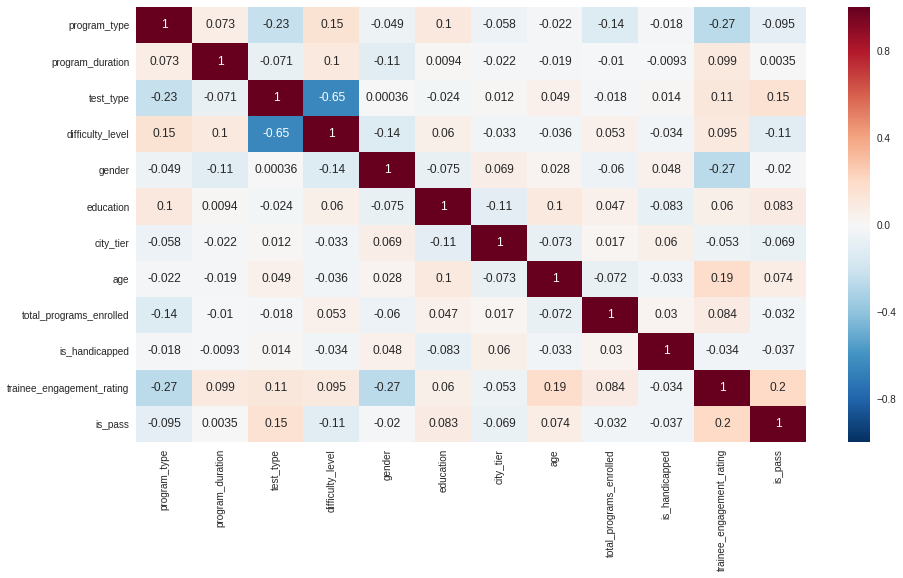

In [43]:
fig = plt.figure(figsize = (15,8))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [44]:
train['age'].unique()

array([ 24.,  26.,  40.,  nan,  42.,  29.,  48.,  45.,  28.,  43.,  27.,
        32.,  44.,  41.,  23.,  38.,  30.,  46.,  25.,  31.,  34.,  56.,
        47.,  33.,  22.,  59.,  49.,  21.,  18.,  35.,  36.,  50.,  55.,
        39.,  51.,  20.,  19.,  54.,  58.,  57.,  37.,  52.,  53.,  17.,
        63.,  60.])

In [45]:
train['age'] = train.groupby(['education','trainee_engagement_rating'])['age'].apply(lambda x: x.fillna(x.mean()))
test['age'] = train.groupby(['education','trainee_engagement_rating'])['age'].apply(lambda x: x.fillna(x.mean()))

In [46]:
train['age'].unique()

array([ 24.        ,  26.        ,  40.        ,  34.97700454,
        42.        ,  29.        ,  48.        ,  45.        ,
        37.14456678,  28.        ,  36.76611647,  33.73449371,
        40.25140449,  37.48781568,  34.79855372,  43.        ,
        27.        ,  32.        ,  35.88515742,  36.31770005,
        44.        ,  41.        ,  39.24078091,  23.        ,
        38.        ,  38.63362919,  30.        ,  46.        ,
        37.96698656,  25.        ,  31.        ,  34.        ,
        56.        ,  47.        ,  33.        ,  22.        ,
        59.        ,  49.        ,  44.6835443 ,  40.3019802 ,
        42.92307692,  21.        ,  18.        ,  35.        ,
        43.53058824,  36.        ,  50.        ,  55.        ,
        39.        ,  51.        ,  20.        ,  31.83333333,
        19.        ,  39.79698709,          nan,  54.        ,
        58.        ,  33.52173913,  57.        ,  37.        ,
        32.28767123,  37.31506849,  52.        ,  53.  

In [47]:
train.isnull().sum()

program_type                  0
program_duration              0
test_type                     0
difficulty_level              0
gender                        0
education                     0
city_tier                     0
age                          77
total_programs_enrolled       0
is_handicapped                0
trainee_engagement_rating    77
is_pass                       0
dtype: int64

In [48]:
train = train.dropna(axis = 0)

In [49]:
train.isnull().sum()

program_type                 0
program_duration             0
test_type                    0
difficulty_level             0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
dtype: int64

In [50]:
#  test= test.dropna(axis = 0)
test = test.fillna(0)

In [51]:
test.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73070 entries, 0 to 73146
Data columns (total 12 columns):
program_type                 73070 non-null int64
program_duration             73070 non-null int64
test_type                    73070 non-null int64
difficulty_level             73070 non-null int64
gender                       73070 non-null int64
education                    73070 non-null int64
city_tier                    73070 non-null int64
age                          73070 non-null float64
total_programs_enrolled      73070 non-null int64
is_handicapped               73070 non-null int64
trainee_engagement_rating    73070 non-null float64
is_pass                      73070 non-null int64
dtypes: float64(2), int64(10)
memory usage: 7.2 MB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null int64
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null int64
difficulty_level             31349 non-null int64
trainee_id                   31349 non-null int64
gender                       31349 non-null int64
education                    31349 non-null int64
city_tier                    31349 non-null int64
age                          31349 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null int64
trainee_engagement_rating    31349 non-null float64
dtypes: float64(2), int64(11), object(2)
memory usage: 3.6+ MB


# ML Models

In [54]:
train.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,0,136,0,1,0,1,3,24.000000,5,0,1.0,0
1,1,131,0,0,1,2,4,26.000000,2,0,3.0,1
2,2,120,1,0,0,1,1,40.000000,1,0,2.0,1
3,1,117,0,0,1,1,3,34.977005,4,0,1.0,1
4,3,131,0,1,1,2,1,42.000000,2,0,4.0,1


In [55]:
X_train = train.drop("is_pass", axis=1)
y_train = train["is_pass"]
X_test  = test.drop(['id','test_id','program_id','trainee_id'], axis=1).copy()

In [56]:
X_test.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1,131,0,1,1,1,3,24.000000,2,0,4.0
1,0,135,1,0,0,3,3,26.000000,4,0,4.0
2,0,120,1,0,0,1,3,40.000000,2,0,3.0
3,3,122,0,3,1,2,1,34.977005,2,0,2.0
4,3,122,0,1,1,1,3,42.000000,2,0,2.0


In [57]:
print(X_train.shape,X_test.shape,y_train.shape)

(73070, 11) (31349, 11) (73070,)


## KNN

In [58]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 3))]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
knn_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
knn_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_knn = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")


81.24 %


In [59]:
# Testing the same algorithm, but on an unstandardised dataset
knn = KNeighborsClassifier(n_neighbors = 3)
knn_unscaled_fit = knn.fit(X_train, y_train)
knn_unscaled_predict = knn.predict(X_test)
acc_knn2 = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn2,2,), "%")

81.91 %


## Logistic Rrgression

In [60]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('log', LogisticRegression())]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
log_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
log_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_log = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

70.81 %


In [61]:
# Testing the same algorithm, but on an unstandardised dataset
log = LogisticRegression()
log_unscaled_fit = log.fit(X_train, y_train)
log_unscaled_predict = log.predict(X_test)
acc_log2 = round(log.score(X_train, y_train) * 100, 2)
print(round(acc_log2,2,), "%")


70.85 %


## Random Forest

In [62]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('ran', RandomForestClassifier(n_estimators=100))]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
ran_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
ran_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_ran = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_ran,2,), "%")

86.75 %


In [63]:
# Testing the same algorithm, but on an unstandardised dataset
ran = RandomForestClassifier(n_estimators=100)
ran_unscaled_fit = ran.fit(X_train, y_train)
ran_unscaled_predict = ran.predict(X_test)
acc_ran2 = round(ran.score(X_train, y_train) * 100, 2)
print(round(acc_ran2,2,), "%")

86.75 %


## SVM

In [64]:
# # Build the pipeline
# steps = [('scaler', StandardScaler()), ('svc', SVC())]
# pipeline = Pipeline(steps)

# # Fit the pipeline to the training data
# svc_scaled_fit = pipeline.fit(X_train, y_train)

# # Predict using the test data
# svc_scaled_predict = pipeline.predict(X_test)

# # Compute and predict model accuracy
# acc_svc = round(pipeline.score(X_train, y_train) * 100, 2)
# print(round(acc_svc,2,), "%")

In [65]:
# Testing the same algorithm, but on an unstandardised dataset
# svc = SVC()
# svc_unscaled_fit = svc.fit(X_train, y_train)
# svc_unscaled_predict = svc.predict(X_test)
# acc_svc2 = round(svc.score(X_train, y_train) * 100, 2)
# print(round(acc_svc2,2,), "%")

## Decision Tree

In [66]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
tree_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
tree_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_tree = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_tree,2,), "%")


86.75 %


In [67]:
# Testing the same algorithm, but on an unstandardised dataset
tree = DecisionTreeClassifier()
tree_unscaled_fit = tree.fit(X_train, y_train)
tree_unscaled_predict = tree.predict(X_test)
acc_tree2 = round(tree.score(X_train, y_train) * 100, 2)
print(round(acc_tree2,2,), "%")

86.75 %


In [68]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log2, 
              acc_ran, acc_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
86.75,Random Forest
86.75,Decision Tree
81.24,KNN
70.85,Logistic Regression


## K- fold Cross validation

In [69]:
Random_Forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(Random_Forest, X_train, y_train, cv=10, scoring = "accuracy")

In [70]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.72961138  0.72642671  0.73203777  0.73190092  0.73039551  0.73231148
  0.72752155  0.73819625  0.7219105   0.73063236]
Mean: 0.730094443971
Standard Deviation: 0.00406517799823


In [71]:
# Building feature importance into a DataFrame
Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(ran.feature_importances_,3)})
Importance = Importance.sort_values('Importance',ascending=False).set_index('Feature')

#Printing DataFrame
Importance

,Importance
Feature,
age,0.324
total_programs_enrolled,0.115
city_tier,0.100
program_duration,0.099
trainee_engagement_rating,0.088
program_type,0.064
difficulty_level,0.055
education,0.055
gender,0.037


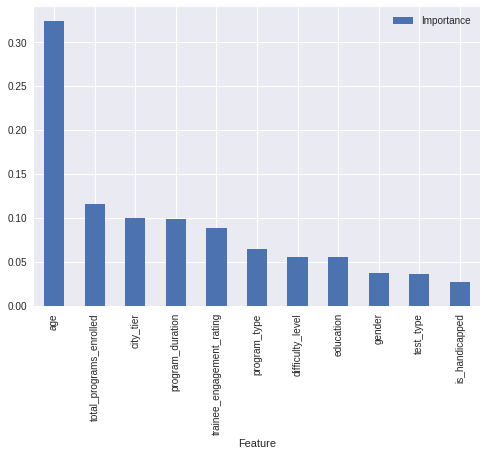

In [72]:
Importance.plot.bar()
plt.show()

In [73]:
# train = train.drop(["gender","is_handicapped"], axis=1)
# test = test.drop(["gender","is_handicapped"], axis=1)

In [74]:
# X_train = train.drop("is_pass", axis=1)
# y_train = train["is_pass"]
# X_test  = test.drop(['id','test_id','program_id','trainee_id'], axis=1).copy()

In [75]:
# # Build the pipeline
# steps = [('scaler', StandardScaler()), ('ran', RandomForestClassifier(n_estimators=100))]
# pipeline = Pipeline(steps)

# # Fit the pipeline to the training data
# ran_scaled_fit = pipeline.fit(X_train, y_train)

# # Predict using the test data
# ran_scaled_predict = pipeline.predict(X_test)

# # Compute and predict model accuracy
# acc_ran = round(pipeline.score(X_train, y_train) * 100, 2)
# print(round(acc_ran,2,), "%")

#Result was 84.61

In [76]:
# # Build a RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100)


# # A new function to allowing reporting of the best scores
# def report(results, n_top=10):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")


# # Specify the parameters and distributions to sample from
# param_dist = {"max_depth": [3, None],
#               "max_features": sp_randint(1, 11),
#               "min_samples_split": sp_randint(2, 11),
#               "min_samples_leaf": sp_randint(1, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# # Performed the RandomizedSearchCV
# n_iter_search = 20
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
#                                    n_iter=n_iter_search)

# # Print the results with the report function
# start = time()
# random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# report(random_search.cv_results_)

In [77]:
# # Build the pipeline
# steps = [('scaler', StandardScaler()), ('ran', RandomForestClassifier(n_estimators=100, 
#                                                                       bootstrap=False, 
#                                                                       criterion='gini', 
#                                                                       max_depth=None, 
#                                                                       max_features=1, 
#                                                                       min_samples_leaf=3, 
#                                                                       min_samples_split=5))]
                                                                    
# pipeline = Pipeline(steps)

# # Fit the pipeline to the training data
# ran1_scaled_fit = pipeline.fit(X_train, y_train)

# # Predict using the test data
# ran1_scaled_predict = pipeline.predict(X_test)

# # Compute and predict model accuracy
# acc_ran1 = round(pipeline.score(X_train, y_train) * 100, 2)
# print(round(acc_ran1,2,), "%")

In [78]:
# # Preparing the dataset for submission
# submission = pd.DataFrame({
#         "id": test["id"],
#         "is_pass": ran_scaled_predict})
# submission.to_csv('submission3.csv', index=False)

In [79]:
# subna = pd.read_csv('submission_nan.csv')
# subna.info()

In [80]:
# Computing the confusion matrix
predictions = cross_val_predict(ran, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 9922, 12319],
       [ 8077, 42752]])

In [81]:
# Computing model precision and recall
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.776306949211
Recall: 0.841094650692


In [82]:
# Calculating the F1 score
f1_score(y_train, predictions)

0.80740321057601505

In [83]:
# Getting prediction probabilities
y_scores = ran.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [84]:
# Compute the true positive and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

In [85]:
# Computing the ROC-AUC score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.942248490311
